In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
streets_graph = ox.graph_from_place('Taipei', network_type='all')
streets_graph = ox.projection.project_graph(streets_graph)

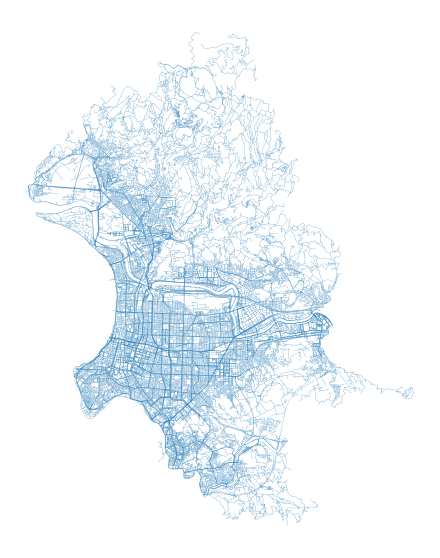

In [6]:
streets = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)
f, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
plt.show()

In [15]:
ox.io.save_graph_shapefile(streets_graph, filepath=None, encoding='utf-8', directed=False)

/usr/local/lib/python3.10/dist-packages/osmnx/io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [20]:
gdf=gpd.read_file('data/graph_shapefile/nodes.shp',encoding='utf-8')
gdf

,osmid,y,x,street_cou,lon,lat,highway,ref,geometry
0,25423587,2.773037e+06,352311.164552,3,121.535748,25.065833,None,None,POINT (352311.165 2773036.974)
1,4596838870,2.773002e+06,352283.356381,1,121.535476,25.065516,None,None,POINT (352283.356 2773002.218)
2,2657578318,2.772943e+06,352388.685064,3,121.536526,25.064988,None,None,POINT (352388.685 2772942.593)
3,25423605,2.770708e+06,353637.436930,4,121.549141,25.044937,traffic_signals,None,POINT (353637.437 2770708.162)
4,618955691,2.770711e+06,353616.278907,4,121.548931,25.044962,traffic_signals,None,POINT (353616.279 2770711.158)
...,...,...,...,...,...,...,...,...,...
70633,9857705343,2.772344e+06,358509.629355,3,121.597258,25.060171,None,None,POINT (358509.629 2772344.151)
70634,9857705328,2.772388e+06,358421.227071,3,121.596378,25.060556,None,None,POINT (358421.227 2772387.734)
70635,9857705329,2.772390e+06,358422.526777,3,121.596390,25.060581,None,None,POINT (358422.527 2772390.479)
70636,9857705333,2.772398e+06,358417.811662,3,121.596343,25.060648,None,None,POINT (358417.812 2772397.916)


In [21]:
gdf_edges=gpd.read_file('data/graph_shapefile/edges.shp',encoding='utf-8')
gdf_edges

,u,v,key,osmid,name,highway,oneway,reversed,length,from,...,lanes,service,ref,access,tunnel,junction,width,est_width,landuse,geometry
0,25423587,4596838870,0,464589452,建國北路三段80巷,living_street,0,True,44.594,4596838870,...,None,None,None,None,None,None,None,None,None,"LINESTRING (352283.356 2773002.218, 352311.165..."
1,25423587,2657578318,0,668037871,建國北路三段,tertiary,1,False,123.260,25423587,...,None,None,None,None,None,None,None,None,None,"LINESTRING (352311.165 2773036.974, 352355.280..."
2,25423587,632564700,0,668037871,建國北路三段,tertiary,1,False,42.559,632564700,...,None,None,None,None,None,None,None,None,None,"LINESTRING (352279.306 2773065.144, 352311.165..."
3,2657578318,624112715,0,238707587,建國北路三段,tertiary,1,False,14.863,2657578318,...,None,None,None,None,None,None,None,None,None,"LINESTRING (352388.685 2772942.593, 352394.470..."
4,2657578318,2657578329,0,"[413973865, 674931330, 260284692]",None,trunk_link,1,False,374.343,2657578329,...,None,None,None,None,None,None,None,None,None,"LINESTRING (352138.408 2773211.553, 352153.796..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106357,9857705340,9857705343,0,79156970,基隆河右岸自行車道,cycleway,0,True,84.801,9857705343,...,None,None,None,None,None,None,None,None,None,"LINESTRING (358509.629 2772344.151, 358540.131..."
106358,9857705323,9857705328,2,1074753394,None,footway,0,True,17.297,9857705323,...,None,None,None,None,None,None,None,None,None,"LINESTRING (358418.729 2772382.278, 358423.819..."
106359,9857705323,9857705328,3,1074753394,None,footway,0,False,17.420,9857705323,...,None,None,None,None,None,None,None,None,None,"LINESTRING (358418.729 2772382.278, 358413.528..."
106360,9857705328,9857705329,0,1074753395,None,footway,0,False,3.046,9857705329,...,None,None,None,None,None,None,None,None,None,"LINESTRING (358422.527 2772390.479, 358421.227..."


In [2]:
streets_graph = ox.graph_from_place('New Taipei', network_type='all')
streets_graph = ox.projection.project_graph(streets_graph)

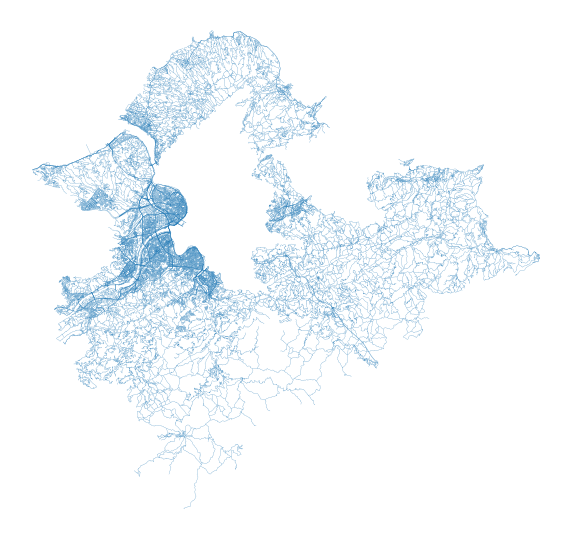

In [3]:
streets = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)
f, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
plt.show()

In [5]:
ox.io.save_graph_shapefile(streets_graph, filepath=None, encoding='utf-8', directed=False)

/usr/local/lib/python3.10/dist-packages/osmnx/io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [11]:
gdf=gpd.read_file('data/graph_shapefile_new_taipei/nodes.shp',encoding='utf-8')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81390 entries, 0 to 81389
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   osmid       81390 non-null  int64   
 1   y           81390 non-null  float64 
 2   x           81390 non-null  float64 
 3   street_cou  81390 non-null  int64   
 4   lon         81390 non-null  float64 
 5   lat         81390 non-null  float64 
 6   ref         114 non-null    object  
 7   highway     5289 non-null   object  
 8   geometry    81390 non-null  geometry
dtypes: float64(4), geometry(1), int64(2), object(2)
memory usage: 5.6+ MB


In [7]:
gdf_edges=gpd.read_file('data/graph_shapefile/edges.shp',encoding='utf-8')
gdf_edges

,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,...,length,bridge,from,to,tunnel,access,service,width,junction,geometry
0,25423153,2324050161,0,"[105190694, 105190689, 327722134]",1,4,1,中山高速公路,motorway,100,...,204.945,yes,25423153,2324050161,None,None,None,None,None,"LINESTRING (340780.572 2773110.592, 340677.295..."
1,25423153,878267977,0,327722135,1,4,1,中山高速公路,motorway,100,...,685.491,None,878267977,25423153,None,None,None,None,None,"LINESTRING (341390.820 2773408.745, 341318.288..."
2,25423153,1501451270,0,"[136861425, 556439146, 556439147]",1,None,None,None,motorway_link,None,...,356.308,None,1501451270,25423153,None,None,None,None,None,"LINESTRING (341062.888 2773326.339, 341056.624..."
3,2324050161,2324050169,0,223512925,1,None,None,中山高速公路,motorway_link,None,...,1199.525,None,2324050161,2324050169,None,None,None,None,None,"LINESTRING (340608.765 2772998.892, 340524.696..."
4,2324050161,2324050183,0,355791330,1,4,1,中山高速公路,motorway,100,...,300.053,None,2324050161,2324050183,None,None,None,None,None,"LINESTRING (340608.765 2772998.892, 340510.157..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109946,9852271595,9852271593,0,1074092658,0,None,None,None,service,None,...,27.705,None,9852271593,9852271595,None,None,None,None,None,"LINESTRING (333377.713 2755260.191, 333390.409..."
109947,9852282164,9852282165,0,1074092669,0,None,None,None,service,None,...,16.614,None,9852282165,9852282164,None,None,None,None,None,"LINESTRING (333894.165 2755436.104, 333877.563..."
109948,9852282164,9852282171,0,442496882,0,None,None,中正路三段70巷,service,None,...,53.991,None,9852282171,9852282164,None,None,None,None,None,"LINESTRING (333874.211 2755488.630, 333877.064..."
109949,9852282171,9852282168,0,1074092671,0,None,None,None,service,None,...,27.741,None,9852282168,9852282171,None,None,None,None,None,"LINESTRING (333846.431 2755488.024, 333874.211..."


In [10]:
gdf=gpd.read_file('google_and_osm/taiwan-latest-free/gis_osm_buildings_a_free_1.shp',encoding='utf-8')
gdf

,osm_id,code,fclass,name,type,geometry
0,9847872,1500,building,第二航廈,None,"POLYGON ((121.23104 25.07759, 121.23123 25.077..."
1,9847873,1500,building,第一航廈,None,"POLYGON ((121.23616 25.08166, 121.23673 25.082..."
2,18583897,1500,building,桃園市立田徑場,None,"POLYGON ((121.32285 24.99376, 121.32286 24.993..."
3,18583899,1500,building,桃園市立綜合體育館（桃園巨蛋）,None,"POLYGON ((121.32237 24.99522, 121.32241 24.995..."
4,23547222,1500,building,桃園,transportation,"POLYGON ((121.21433 25.01274, 121.21449 25.012..."
...,...,...,...,...,...,...
335730,1075139661,1500,building,中山 Center,commercial,"POLYGON ((121.41836 24.96206, 121.41864 24.962..."
335731,1075148766,1500,building,大業鴻圖,construction,"POLYGON ((121.43228 24.97011, 121.43252 24.970..."
335732,1075148768,1500,building,None,industrial,"POLYGON ((121.43263 24.97037, 121.43287 24.970..."
335733,1075148769,1500,building,捨得企業,industrial,"POLYGON ((121.43272 24.97119, 121.43286 24.971..."


In [8]:
gdf=gpd.read_file('google_and_osm/taiwan-latest-free/gis_osm_pois_free_1.shp',encoding='utf-8')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 115436 entries, 0 to 115435
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   osm_id    115436 non-null  object  
 1   code      115436 non-null  int64   
 2   fclass    115436 non-null  object  
 3   name      90499 non-null   object  
 4   geometry  115436 non-null  geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 4.4+ MB


In [9]:
gdf=gpd.read_file('google_and_osm/taiwan-latest-free/gis_osm_roads_free_1.shp',encoding='utf-8')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 586506 entries, 0 to 586505
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   osm_id    586506 non-null  object  
 1   code      586506 non-null  int64   
 2   fclass    586506 non-null  object  
 3   name      204994 non-null  object  
 4   ref       44182 non-null   object  
 5   oneway    586506 non-null  object  
 6   maxspeed  586506 non-null  int64   
 7   layer     586506 non-null  int64   
 8   bridge    586506 non-null  object  
 9   tunnel    586506 non-null  object  
 10  geometry  586506 non-null  geometry
dtypes: geometry(1), int64(3), object(7)
memory usage: 49.2+ MB


In [21]:
builds_graph = ox.geometries.geometries_from_place('Taipei', {'building': True}, which_result=None, buffer_dist=None)
builds_graph

/usr/local/lib/python3.10/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.10/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


entrance  \
element_type osmid                 
node         2299778942      NaN   
             2311321587      NaN   
             2336793458      NaN   
             3210138071      NaN   
             3210138232      NaN   
...                          ...   
relation     14107377        NaN   
             14107378        NaN   
             14108510        NaN   
             14118595        NaN   
             14230266        NaN   

                                                                  geometry  \
element_type osmid                                                           
node         2299778942                         POINT (121.56774 25.16519)   
             2311321587                         POINT (121.57840 25.08754)   
             2336793458                         POINT (121.50663 25.12450)   
             3210138071                         POINT (121.56479 25.09936)   
             3210138232                         POINT (121.56514 25.09998)   
...                                                                    ...   
relation     14107377    POLYGON ((121.52614 25.05498, 121.52614 25.055...   
             14107378    POLYGON ((121.52628 25.05534, 121.52633 25.055...   
             14108510    POLYGON ((121.50742 25.03448, 121.50742 25.034...   
             14118595    POLYGON ((121.50684 25.03433, 121.50685 25.034...   
             14230266    POLYGON ((121.51471 25.03764, 121.51470 25.037...   

                                  amenity barrier addr:city addr:country  \
element_type osmid                                                         
node         2299778942           shelter     NaN       NaN          NaN   
             2311321587               NaN     NaN       NaN          NaN   
             2336793458  place_of_worship     NaN       台北市           TW   
             3210138071               NaN     NaN       NaN          NaN   
             3210138232               NaN     NaN       NaN          NaN   
...                                   ...     ...       ...          ...   
relation     14107377                 NaN     NaN       NaN          NaN   
             14107378          restaurant     NaN       臺北市          NaN   
             14108510                 NaN     NaN       NaN          NaN   
             14118595                 NaN     NaN       NaN          NaN   
             14230266                 NaN     NaN       NaN          NaN   

                        addr:district addr:housenumber addr:postcode  \
element_type osmid                                                     
node         2299778942           NaN              NaN           NaN   
             2311321587           NaN              NaN           NaN   
             2336793458           北投區              295           112   
             3210138071           NaN              NaN           NaN   
             3210138232           NaN              NaN           NaN   
...                               ...              ...           ...   
relation     14107377             NaN              NaN           NaN   
             14107378             中山區               32           NaN   
             14108510             NaN              NaN           NaN   
             14118595             NaN              NaN           NaN   
             14230266             NaN              NaN           NaN   

                        addr:street  ... official_name:es official_name:fr  \
element_type osmid                   ...                                     
node         2299778942         NaN  ...              NaN              NaN   
             2311321587         NaN  ...              NaN              NaN   
             2336793458         公館路  ...              NaN              NaN   
             3210138071         NaN  ...              NaN              NaN   
             3210138232         NaN  ...              NaN              NaN   
...                             ...  ...              ...           